In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
import seaborn as sns

# Flip a coin : Reality vs Theory

## 1. Four Flips

Quick reminder : a probability of 0 means an event will never occur. A probability of 1 means it will happen for sure.

Let's start smoothly : Suppose we flip a coin 4 times. Can you answer the following questions :
- How many possible outcomes could happen?
- What's the probability to get 4 heads?
- What's the probability to get 2 heads and 2 tails?

To answer these "easy" questions, you could count the number of ways to get a result. For example, there are 16 possible outcomes and there are 6 ways to get 2 heads and 2 tails :
- 1 1 0 0
- 1 0 1 0
- 1 0 0 1
- 0 1 1 0
- 0 1 0 1
- 0 0 1 1

where 1 represents heads and 0 tails. Let's call __A__ the event where we get 2 heads and 2 tails. That means that the probability of A is P(A) = 6/16 = 0.375. But if the number of flips is larger, it becomes more difficult to count manually the different possibilities.

Mathematically, the number of ways to get $x$ heads (or tails) in $n$ flips could be calculated as :

$\large possibilities = \frac{n!}{x! (n - x)!}$

where $n!$ means factorial of n : $4! = 4 \times 3 \times 2 \times 1 = 24$

and can be accessed with [`math.factorial()`](https://docs.python.org/3/library/math.html)

❓ For this exercise, implement the functions below.   
When comfortable with your solutions, add them in `flip_coins_factorial.py` and try to pass the tests with `Make`.

In [4]:
def factorial(number):
    '''TO DO: return the factorial of the number'''
    result = 1
    for i in range(1, number):
        result += result * i
    return result

In [6]:
def count_possibilities(n_toss, n_heads):
    '''TO DO: return the number of possibilities to get n_heads when flipping the coin n_toss times
        Ex: count_possibilities(4, 4)  = 1'''
    return factorial(n_toss)/(factorial(n_heads)*factorial(n_toss - n_heads))
count_possibilities(4, 2)

6.0

In [9]:
def count_total_possibilities(n_toss):
    '''TO DO: return the total amount of differentt combinations when flipping the coins n_toss times
        Ex: count_total_possibilities(3) = 8'''
    result = 1
    for i in range(n_toss):
        result = result * 2
    return result

In [12]:
def probability(n_toss):
    '''return a dictionnary. `play_n_game` The keys will be the possible number of heads of each game, the values for each of those keys will correspond
            to the probability of a game ending with that result.'''
    dict_proba = {}
    for i in range (n_toss + 1):
        dict_proba[i] = count_possibilities(n_toss, i)/count_total_possibilities(n_toss)
    return dict_proba
print(probability(4))

{'0': 0.0625, '1': 0.25, '2': 0.375, '3': 0.25, '4': 0.0625}


## 2. Theory : What could we expect?

We will flip a coin (each flip has an equal chance of coming up as heads or tails). This kind of experiment has no memory, in other words, each "flip is independent". Even though there is no way to predict what will be the next flip, if we flip a coin a number of times, the laws of probability allow us to predict the probability of obtaining various results. The accuracy will be greater as the number of flips increases.

In [24]:
from flip_coin_factorial import probability, count_possibilities, count_total_possibilities, factorial
probability(5).keys()

dict_keys([0, 1, 2, 3, 4, 5])

Let's see how the probability behaves as we make more and more flips. 

❓ In a histogram, plot the output of `probability(n_toss)` with different values for `n_toss`.

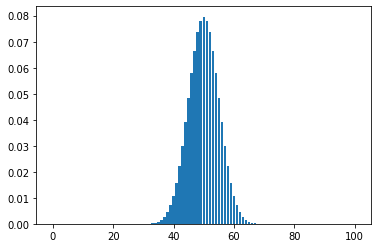

In [32]:
plt.bar(probability(100).keys(),probability(100).values());

If your implementation is correct, the more flips you do (n_toss increases), the more the graph becomes smoother and approaches the “bell curve”, or **normal distribution**. Try For example `n_toss = 100`

## 3. In practice, do we get the same results?

You've already made big strides. But at this point, we could ask ourselves: does the real world behave this way? Again, let's use the power of Python to answer this question.

❓ For this exercise, implement the two functions below.  
When confortable with your results, copy them inside `simulate_reality.py` and test them with `make`

### 3.1 `play_one_game(n_toss)`

One game consists in flipping a coin `n_toss` times. This function should return the number of heads you get. 

One way to do that is by randomly choosing an integer between 0 (head) and 1 (tail). If you get 0, you increment your `heads_counter` otherwise it stays the same. Your function should return the `heads_counter`. 

```python
import random
random.randint(0, 1) # use this to pass the make tests
```

In [44]:
import random as rand

In [49]:
def play_one_game(n_toss):
    '''returns the number of heads after n_toss'''
    head_counter = 0
    for i in range(n_toss):
        head_counter += rand.randrange(0, 2, 1)
    return head_counter

### 3.2 `play_n_game(n_games, n_toss)`

Imagine you repeat the previous game `n_games` times.

The goal here is to play a bunch of flip coin games and see the distribution of the values we get from flipping a coin `n_toss` times.

This new function will call your previously defined `play_one_game` function `n_games` times. Then, we want to keep track of the end result of each game played this way.

`play_n_game` should return a dictionary. The keys will be the possible `head_counter` of each game, and the values will correspond to the ratio of a games ending with that number of heads.

EX : Imagine you play 10 coinflips (=n_games) where you flip the coin 6 times (=n_toss) and you get  
- 0 coinflips showing 0 heads  
- 1 coinflips showing 1 head  
- 3 coinflips showing 2 heads  
- 3 coinflips showing 3 heads  
- 2 coinflips showing 4 heads  
- 1 coinflips showing 5 heads  
- 0 coinflips showing 6 heads
    
```python
=> result = {0:0/n_games, 
             1:1/n_games,
             2:3/n_games,
             3:3/n_games,
             4:2/n_games,
             5:1/n_games,
             6:0/n_games }
```

In [50]:
a = [2, 2, 3]
a.count(2)

2

In [56]:
def play_n_game(n_games, n_toss):
    """returns a dictionary where the keys are the possible head counts of each game
     and the values will the probability of a game ending with that number of heads.
    """
    results_list = []
    for i in range(n_games):
        results_list.append(play_one_game(n_toss))
    dict_proba = {}
    for j in range (n_toss + 1):
        if results_list.count(j) != 0:
            dict_proba[j] = results_list.count(j)/n_games
        else:
            continue
    return dict_proba
play_n_game(100, 5)

{0: 0.03, 1: 0.11, 2: 0.23, 3: 0.41, 4: 0.17, 5: 0.05}

### 3.3 Visualize practice results

❓ Import your validated functions from `simulate_reality.py` and plot the result as histogram.

Just as before, try different values for `n_toss` an `n_games`. What do you observe?

Compare these two graphs (with the same value for `n_toss`). What do you observe?

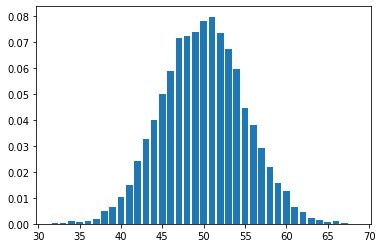

In [68]:
from simulate_reality import play_one_game, play_n_game
result = play_n_game(10000, 100) 
plt.bar(result.keys(), result.values());

## 4. Compare results with Mean Squared Error (MSE)

If you have a look at the 2 graphs (theory vs reality), you should notice that they both look like a normal distribution. But as usual, we need a proof, we need a number to confirm this intuition.

❓ Implement the function `mean_squared_error(n_games, n_toss)` below and test it in the `comparison.py` file. 
This function should simply return the squared error between theorical and "actual" results (obtained through simulation). 
Copy your code in `comparison.py` and check your result with `make`

In [132]:
from flip_coin_factorial import probability
from simulate_reality import play_n_game
display(play_n_game(3, 100))
# probability(100)

{50: 0.3333333333333333, 51: 0.3333333333333333, 52: 0.3333333333333333}

In [136]:
from flip_coin_factorial import probability
from simulate_reality import play_n_game

def mean_squared_error(n_games, n_toss):
    '''TO DO: return the squared error between theorical and "actual"
    results (get through simulation)'''
    play = play_n_game(n_games, n_toss)
    prob = probability(n_toss)
    newdict = {}
    for j in range(n_toss+1):
        newdict[j] = 0
    # print(prob)
    for k in range(n_toss+1):
        if k in play.keys():
            newdict[k] = play[k]
    # print(newdict)
    mse = 0
    for i in range(n_toss+1):
        mse += (prob[i] - newdict[i])**2
        # print(mse)
    return mse/n_toss
print(mean_squared_error(3, 100))

0.0023558520440994744


In [143]:
# Show the RMSE instead as it is easier to interpret
print('RMSE:', '{:.2f}'.format(mean_squared_error(10,10)**0.5*100), '%')

RMSE: 9.19 %
